In [1]:
#Importing Libraries
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#Assigning Colors for companies
palette = ['#ff1493', '#ffd700']

In [3]:
#Loading Data
cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
City_data = pd.read_csv('City.csv')
Transaction_data = pd.read_csv('Transaction_ID.csv')

In [102]:
cab_data.head()

(359392, 7)

In [5]:
#converting excel serial date to datetime
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x: xlrd.xldate_as_datetime(x,0))
# cab_data.apply(xlrd.xldate_as_datetime('Date of Travel', 0)) 
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
cab_data.shape

(359392, 7)

In [103]:
customer_data.head()
customer_data.shape

(49171, 4)

In [9]:
City_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [10]:
print(City_data.shape)

(20, 3)


In [11]:
Transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [105]:
Transaction_data.shape

(440098, 3)

In [12]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [13]:
len(City_data['City'].unique())

20

In [14]:
len(cab_data['City'].unique())

19

In [15]:
#Merging customer_data with transaction_data
df = cab_data.merge(Transaction_data, on = 'Transaction ID').merge(customer_data, on = 'Customer ID')

In [16]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [17]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [19]:
#making copy
new_df = df.copy()

In [20]:
new_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [21]:
#checking for null values
new_df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [22]:
#checking for duplicated values
new_df.duplicated().sum()

0

In [23]:
#Extracting only city from City column
new_df['City'] = new_df['City'].apply(lambda x: x.split(x.split()[-1])[0].title())

In [24]:
new_df['City']

0         Atlanta 
1         Atlanta 
2         Atlanta 
3         Atlanta 
4         Atlanta 
            ...   
359387    Seattle 
359388    Silicon 
359389     Tucson 
359390     Tucson 
359391     Tucson 
Name: City, Length: 359392, dtype: object

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [26]:
len(new_df['City'].unique())

19

In [27]:
#Converting Population and Users  columns to numeric
City_data['Population'] = City_data['Population'].apply(lambda x: x.replace(",", "")).astype('int64')
City_data['Users'] = City_data['Users'].apply(lambda x: x.replace(",", "")).astype('int64')
City_data['City'] = City_data['City'].apply(lambda x: x.split(x.split()[-1])[0].title())

In [28]:
City_data.head()

,City,Population,Users
0,New York,8405837,302149
1,Chicago,1955130,164468
2,Los Angeles,1595037,144132
3,Miami,1339155,17675
4,Silicon,1177609,27247


In [29]:
City_data['Non_User'] = City_data['Population'] - City_data['Users']

In [30]:
new_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,Atlanta,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,Atlanta,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,Atlanta,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,Atlanta,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,Atlanta,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [31]:
#Extracting year,Month, days, 
new_df['Year'] = new_df['Date of Travel'].dt.year
new_df['Month'] = new_df['Date of Travel'].dt.month
new_df['Day'] = new_df['Date of Travel'].dt.day_name()

In [32]:
new_df['Day']

0            Friday
1          Saturday
2            Friday
3         Wednesday
4          Saturday
            ...    
359387       Sunday
359388    Wednesday
359389     Thursday
359390     Saturday
359391     Thursday
Name: Day, Length: 359392, dtype: object

In [33]:
#Extracting price per km, cost per km, profit, profit_ per_km
new_df['Price_per_km'] = new_df['Price Charged']/new_df['KM Travelled']# price the cab charge per km
new_df['Cost_per_km'] = new_df['Cost of Trip']/new_df['KM Travelled']#Cost of running the car per km
new_df['Profit'] = new_df['Price Charged'] - new_df['Cost of Trip']# profit made per trip
new_df['Profit_per_km'] = new_df['Price_per_km'] - new_df['Cost_per_km']# profit made per km

In [34]:
new_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day,Price_per_km,Cost_per_km,Profit,Profit_per_km
0,10000011,2016-01-08,Pink Cab,Atlanta,30.45,370.95,313.6350,29290,Card,Male,28,10813,2016,1,Friday,12.182266,10.30,57.3150,1.882266
1,10351127,2018-07-21,Yellow Cab,Atlanta,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2018,7,Saturday,22.859870,12.12,281.2772,10.739870
2,10412921,2018-11-23,Yellow Cab,Atlanta,42.55,792.05,597.4020,29290,Card,Male,28,10813,2018,11,Friday,18.614571,14.04,194.6480,4.574571
3,10000012,2016-01-06,Pink Cab,Atlanta,28.62,358.52,334.8540,27703,Card,Male,27,9237,2016,1,Wednesday,12.526904,11.70,23.6660,0.826904
4,10320494,2018-04-21,Yellow Cab,Atlanta,36.38,721.10,467.1192,27703,Card,Male,27,9237,2018,4,Saturday,19.821330,12.84,253.9808,6.981330


### Distribution by Age category

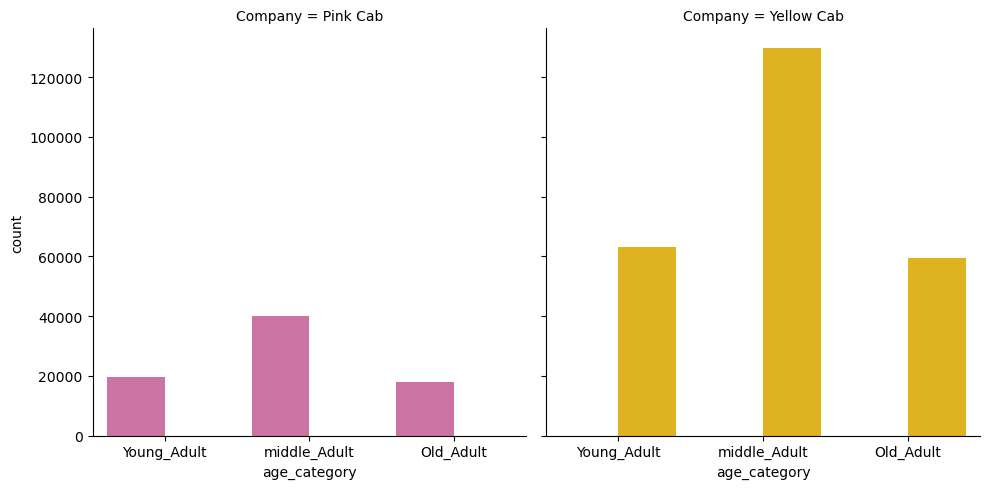

In [35]:
new_df['age_category'] = pd.cut(new_df['Age'], [18,25,40,60], 
                               labels = ['Young_Adult', 'middle_Adult', 'Old_Adult'])
sns.catplot(x = 'age_category', col = 'Company', data = new_df, kind = 'count',hue='Company',palette = ['#d965a4', '#ffc400']);

### Distribution of users by Gender

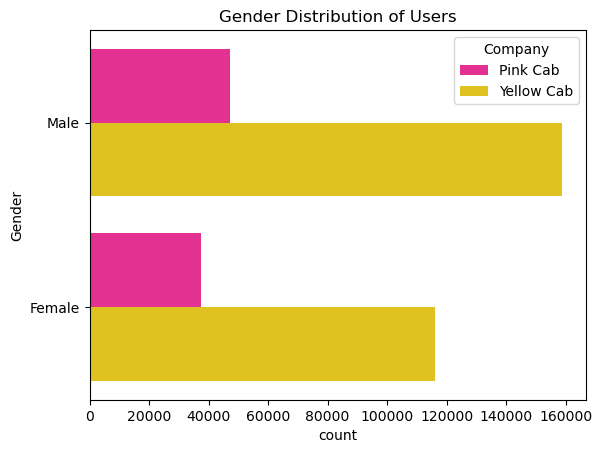

In [36]:
#checking unique
sns.countplot(data = new_df, y = 'Gender',hue = 'Company',palette = palette)
plt.title('Gender Distribution of Users')
plt.show()

The proportion of male passengers is greater than that of female passengers, yet both companies have the same gender distribution among their passengers

### Distribution of users and non-users of cab services by Cities

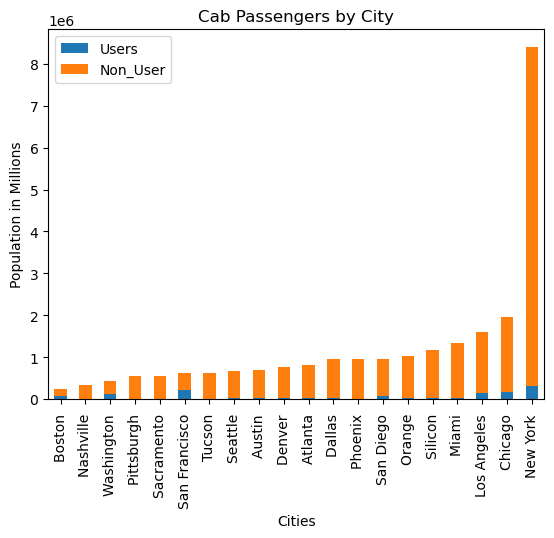

In [37]:
City_data.sort_values(['Population', 'Users'])[['Users', 'Non_User','City']].plot(kind= 'bar',y = ['Users', 'Non_User'], x = 'City',stacked = True, title = "Cab Passengers by City")
plt.ylabel("Population in Millions")
plt.xlabel("Cities")
plt.show()

New York City has the largest population among the cities where the two cab companies operate and it also has a high number of users for their services. Chicago and Los Angeles are also major cities with large populations and significant demand for cab services.

### Distribution of number of trips by Cities

In [38]:
Dist_across_cities = new_df.groupby(['City','Company',"Year"]).size().reset_index().rename(columns ={0:'Number of Trips'})
Dist_across_cities.head()


,City,Company,Year,Number of Trips
0,Atlanta,Pink Cab,2016,524
1,Atlanta,Pink Cab,2017,632
2,Atlanta,Pink Cab,2018,606
3,Atlanta,Yellow Cab,2016,1713
4,Atlanta,Yellow Cab,2017,2079


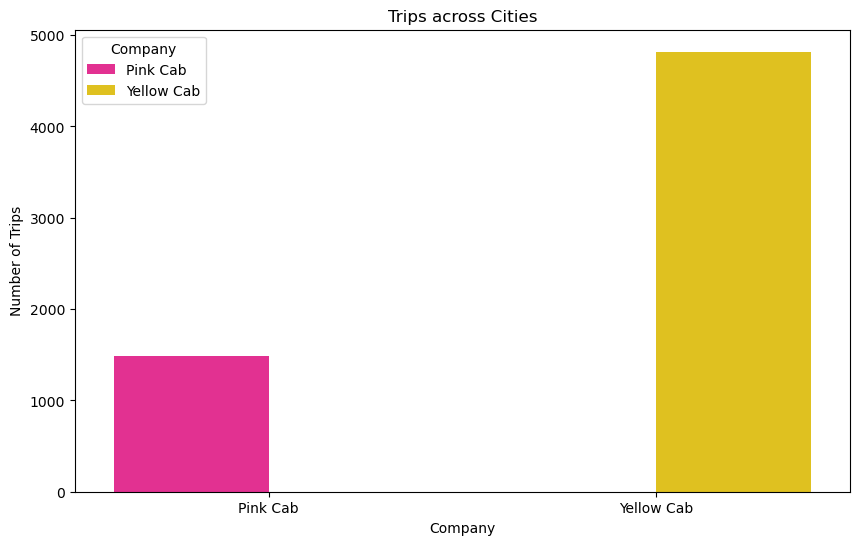

In [39]:
plt.figure(figsize = (10,6))
sns.barplot(data = Dist_across_cities, y = 'Number of Trips',x='Company',hue = 'Company',palette = palette, ci = False)
plt.title("Trips across Cities")
plt.show()


On average the yellow cab has a larger customer base compared to the pink cab in most cities, while the pink cab only has a larger customer base in a few cities such as San Diego, Nashville, Sacramento and Pittsburgh.

### Price Charge per km

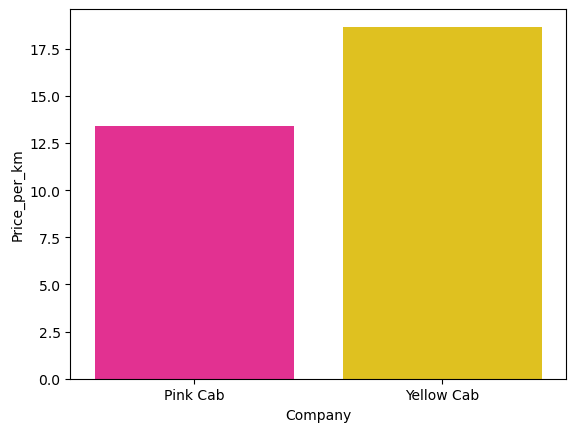

In [96]:
#Price_per_km
Price_per_km_cities = new_df.groupby(['City','Company','Year'])['Price_per_km'].mean().reset_index()
sns.barplot(data = Price_per_km_cities, y = 'Price_per_km',x='Company',palette = palette,ci = False)
plt.show()

Yellow cab charges higher rates than pink cab. The pink cab is estimated to have an average fare of around 13 dollars per km while the yellow cab is estimated to have an average fare of around 18 dollars per km. 

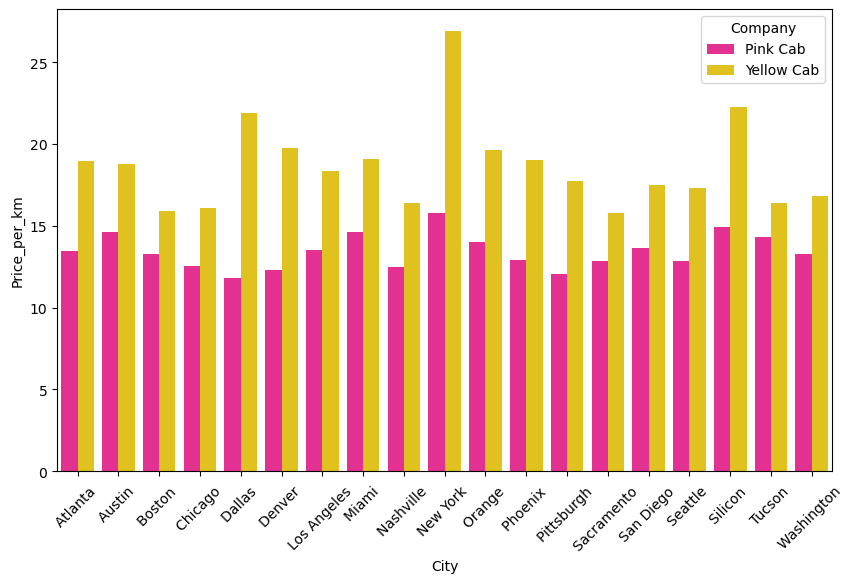

In [93]:
plt.figure(figsize = (10,6))
Price_per_km_cities = new_df.groupby(['City','Company','Year'])['Price_per_km'].mean().reset_index()
sns.barplot(data = Price_per_km_cities, y = 'Price_per_km',x='City',hue='Company',palette = palette,ci = False)
plt.xticks(rotation = 45) 
plt.show()

it seems that across all cities, the yellow cab company charges more than the pink cab company, even in cities where the pink cab company has a larger customer base. 

### Cost incurr per km

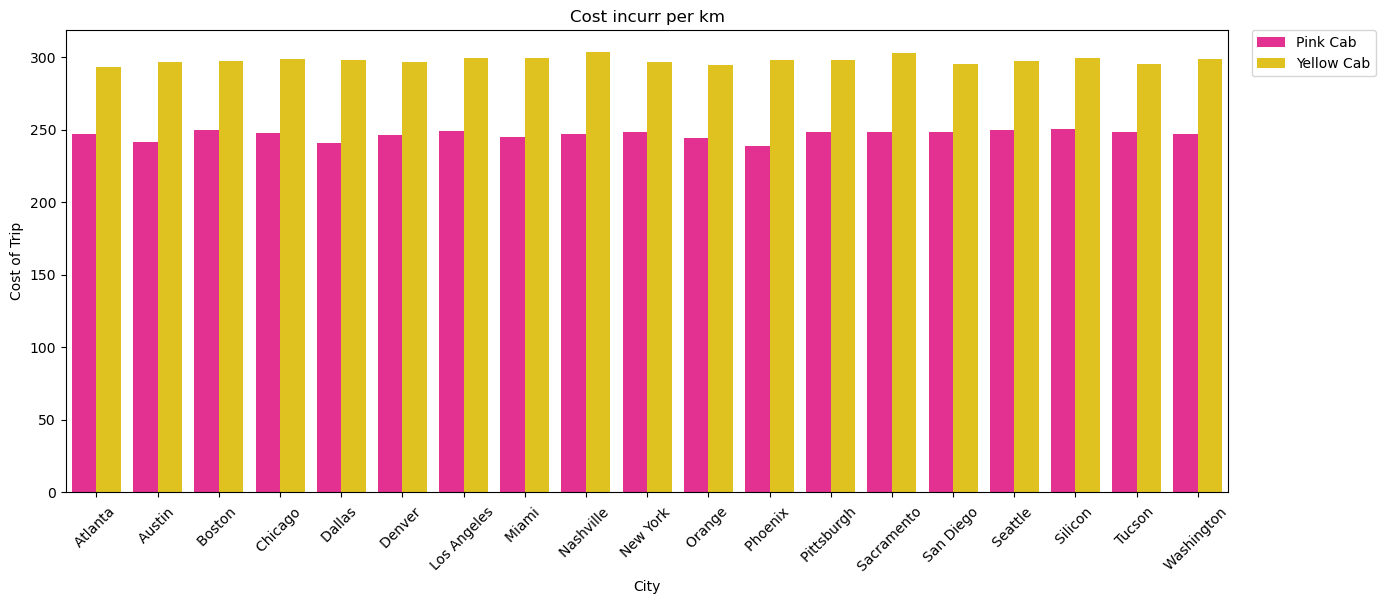

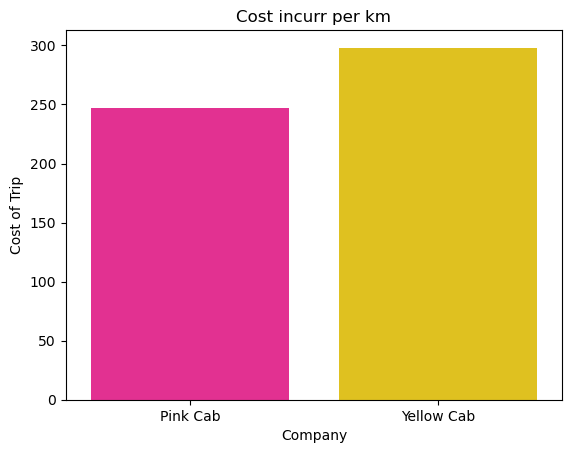

In [101]:
plt.figure(figsize = (15,6))
new_df['Cost_per_km'] = new_df['Cost of Trip']/new_df['KM Travelled']
Cost_per_km_km_cities = new_df.groupby(['City','Company','Year'])['Cost of Trip'].mean().reset_index()
sns.barplot(data = Cost_per_km_km_cities, y = 'Cost of Trip',x='City',hue = "Company",palette = palette,ci=None)
plt.title('Cost incurr per km')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 45) 
plt.show()
#Price_per_km
sns.barplot(data = Cost_per_km_km_cities, y = 'Cost of Trip',x='Company',palette = palette,ci = False)
plt.title('Cost incurr per km')
plt.show()

On average, the Yellow Cab company incurred higher costs than the Pink Cab company across all trips in the cities.

### Profit per km 

In [58]:
profit_km = new_df.groupby(['Company','City'])['Profit_per_km'].mean().reset_index()
print(profit_km)

       Company          City  Profit_per_km
0     Pink Cab      Atlanta        2.418367
1     Pink Cab       Austin        3.601619
2     Pink Cab       Boston        2.234623
3     Pink Cab      Chicago        1.508437
4     Pink Cab       Dallas        0.825393
5     Pink Cab       Denver        1.276010
6     Pink Cab  Los Angeles        2.501389
7     Pink Cab        Miami        3.601181
8     Pink Cab    Nashville        1.521093
9     Pink Cab     New York        4.790525
10    Pink Cab       Orange        3.008943
11    Pink Cab      Phoenix        1.894585
12    Pink Cab   Pittsburgh        1.066107
13    Pink Cab   Sacramento        1.815109
14    Pink Cab    San Diego        2.638450
15    Pink Cab      Seattle        1.825484
16    Pink Cab      Silicon        3.898292
17    Pink Cab       Tucson        3.267249
18    Pink Cab   Washington        2.308069
19  Yellow Cab      Atlanta        5.793907
20  Yellow Cab       Austin        5.573738
21  Yellow Cab       Boston     

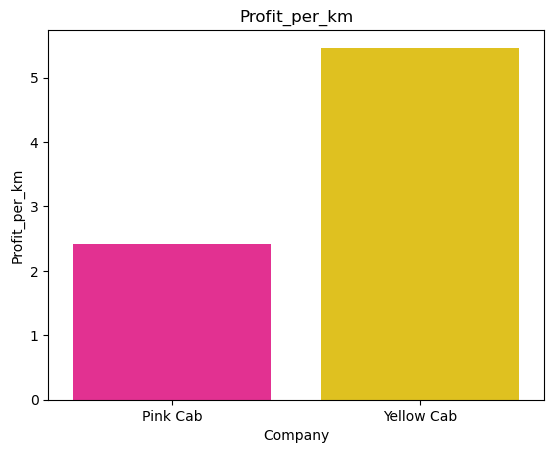

In [61]:

sns.barplot(data = profit_km, y = 'Profit_per_km',x='Company',palette = palette, ci = False)
plt.title("Profit_per_km")
plt.show()

<Figure size 1000x600 with 0 Axes>

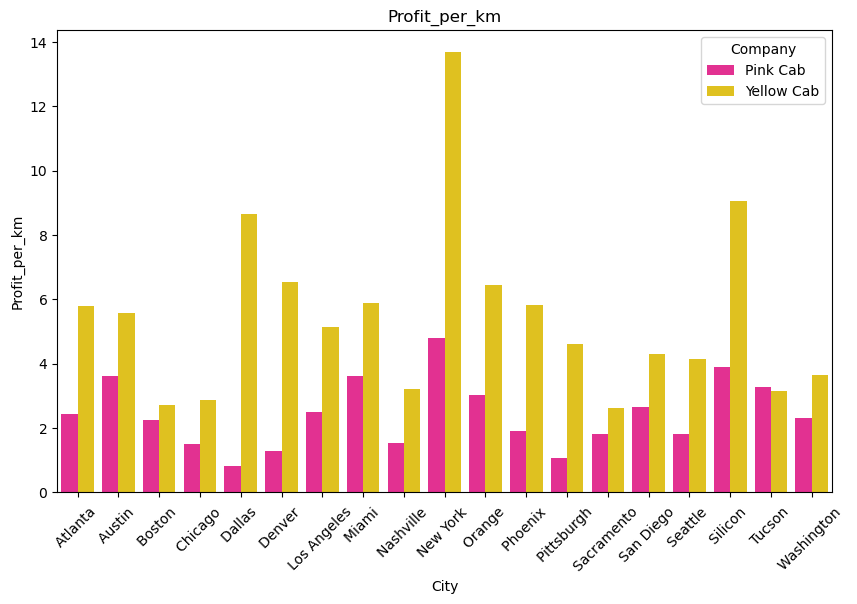

In [59]:
plt.figure(figsize = (10,6))
sns.barplot(data = profit_km, y = 'Profit_per_km',x='City',hue = 'Company', palette = palette,ci = False)
plt.xticks(rotation = 45) 
plt.title("Profit_per_km")
plt.show()

On average, the profit per kilometer for Yellow Cab is higher than that of Pink Cab. Yellow Cab is estimated to make 7 dollars per kilometer while Pink Cab is estimated to make less than 3 dollars per kilometer. Additionally, Yellow Cab generally makes more profit across the cities in which both companies operate.

### loss Analysis

In [47]:
loss = new_df.query("Profit_per_km <= 0")

In [48]:
loss

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day,Price_per_km,Cost_per_km,Profit,Profit_per_km,age_category
26,10246065,2017-10-29,Yellow Cab,Austin,35.97,492.70,500.7024,33788,Cash,Male,23,23788,2017,10,Sunday,13.697526,13.92,-8.0024,-0.222474,Young_Adult
55,10033870,2016-05-18,Pink Cab,Boston,38.76,358.90,437.9880,58774,Card,Male,20,23602,2016,5,Wednesday,9.259546,11.30,-79.0880,-2.040454,Young_Adult
65,10020665,2016-03-31,Yellow Cab,Boston,31.64,407.07,432.8352,58627,Card,Male,28,27338,2016,3,Thursday,12.865676,13.68,-25.7652,-0.814324,middle_Adult
78,10362532,2018-08-16,Yellow Cab,Boston,13.09,162.15,168.0756,58627,Card,Male,28,27338,2018,8,Thursday,12.387319,12.84,-5.9256,-0.452681,middle_Adult
83,10065021,2016-08-23,Yellow Cab,Boston,14.70,194.14,204.6240,59007,Card,Male,63,6683,2016,8,Tuesday,13.206803,13.92,-10.4840,-0.713197,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359164,10432110,2018-12-23,Yellow Cab,Sacramento,43.68,510.94,618.5088,46035,Cash,Male,27,18316,2018,12,Sunday,11.697344,14.16,-107.5688,-2.462656,middle_Adult
359165,10432113,2018-12-21,Yellow Cab,Sacramento,15.30,198.66,216.6480,47592,Cash,Male,25,2719,2018,12,Friday,12.984314,14.16,-17.9880,-1.175686,Young_Adult
359167,10432117,2018-12-22,Yellow Cab,Sacramento,38.42,445.29,539.4168,45997,Cash,Male,45,18280,2018,12,Saturday,11.590057,14.04,-94.1268,-2.449943,Old_Adult
359170,10432622,2018-12-17,Yellow Cab,Seattle,18.72,258.00,269.5680,36110,Card,Female,18,4674,2018,12,Monday,13.782051,14.40,-11.5680,-0.617949,NaN


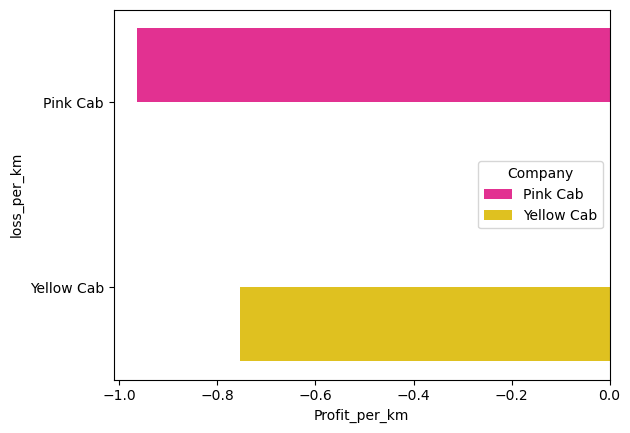

In [50]:
loss_km_city =loss.groupby(["Year",'City','Company'])['Profit_per_km'].mean().reset_index()
sns.barplot(data = loss_km_city, x = 'Profit_per_km',y='Company',hue = "Company", palette = palette,ci= False)
plt.ylabel('loss_per_km')
plt.show()


On average, the Pink Cab company incurred higher losses per kilometer than the Yellow Cab company.

### Yearly seasonality of Cost of trip

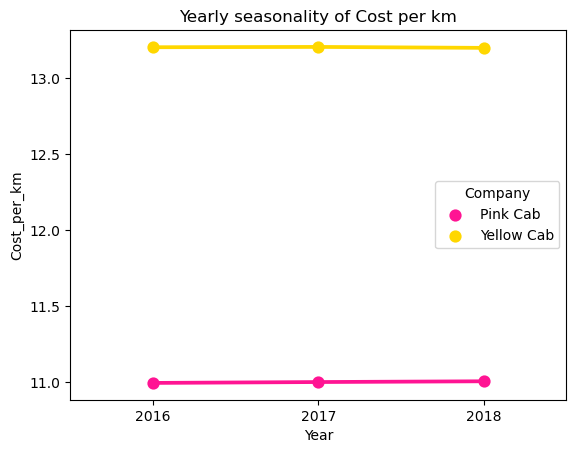

In [94]:
#Average Cost per km Trend over ther years
Yearly_Cost_per_km = new_df.groupby(["Year",'Company'])['Cost_per_km'].mean().reset_index()
sns.pointplot(y = 'Cost_per_km', x = 'Year', data = Yearly_Cost_per_km , kind = 'bar', hue = 'Company', palette = palette)
plt.title('Yearly seasonality of Cost per km')
plt.show()

The trend of cost incurred per kilometer has remained consistent over time, with Yellow Cab incurring more cost per kilometer than Pink Cab.

### Yearly seasonality of Profit

   Year     Company  Profit_per_km
0  2016    Pink Cab       3.026813
1  2016  Yellow Cab       7.489847
2  2017    Pink Cab       2.962883
3  2017  Yellow Cab       7.494612
4  2018    Pink Cab       2.350447
5  2018  Yellow Cab       6.364805


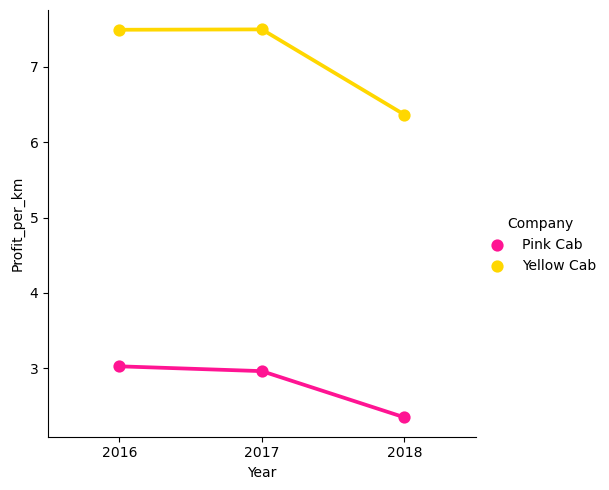

In [91]:
#Average_Profit_per km Trend over ther years
Profit_per_km_yearly = new_df.groupby(['Year', 'Company'])['Profit_per_km'].mean().reset_index()
print(Profit_per_km_yearly)
sns.catplot(y='Profit_per_km', x = 'Year', data = Profit_per_km_yearly ,kind = 'point', hue = 'Company', palette = palette)
plt.show()
# plt.title('Yearly seasonality of Profit')
# plt.show()


The average profit per kilometer for the taxi cab companies was roughly the same for the years 2016 and 2017, but saw a significant decrease in 2018.


### Yearly seasonality of loss

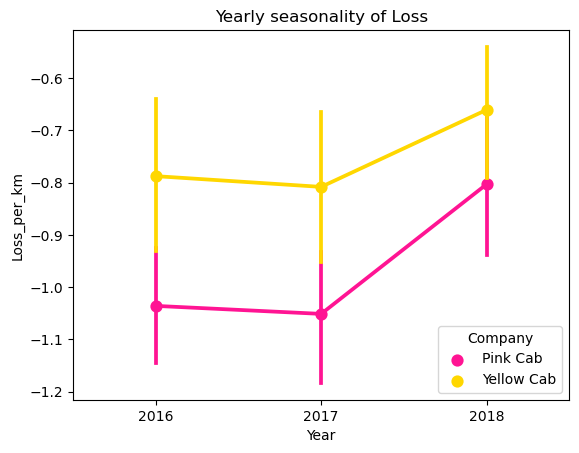

In [54]:
sns.pointplot(data = loss_km_city, x = 'Year',y='Profit_per_km',hue = "Company", palette = palette)
plt.title('Yearly seasonality of Loss')
plt.ylabel('Loss_per_km')
plt.show()

### Yearly seasonality of number of trip

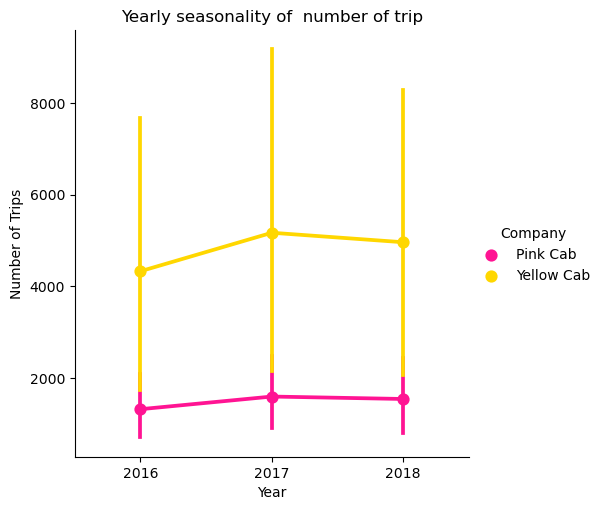

In [99]:
sns.catplot(y = 'Number of Trips', x = 'Year', data = Dist_across_cities ,kind = 'point', hue = 'Company', palette = palette)
plt.title('Yearly seasonality of  number of trip')
plt.show()

The number of trips taken by both yellow and pink cab companies increased from 2016 to 2017, and then decreased slightly in 2018. Additionally, on average, yellow cab companies took more trips than pink companies.

### Recommendations

Based on the analysis, it appears that Yellow cab is performing better than Pink cab in several key areas. Yellow cab has a higher customer reach in most cities, charges higher price per km, undertook more trips, has a higher average profit per KM, and lower loss per km compared to Pink cab. However, it is also noted that on average, Yellow cab incurs more cost per km than Pink cab.

Overall, the pros of investing in Yellow cab outweigh the cons. Yellow cab's higher customer reach, higher average profit per KM and lower loss per KM would make it a more profitable investment opportunity than Pink cab. 
